<a href="https://colab.research.google.com/github/razanalbaqami/93_Python_Data_Analytics_Projects/blob/main/Copy_of_Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [3]:
#Read data set

accidents = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [4]:
accidents.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
accidents.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9018,12:55:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Governmental,NaN,...,Going straight,na,na,na,na,Driver,NaN,Not a Pedestrian,Overturning,Slight Injury
9019,12:55:00,Monday,31-50,Male,Junior high school,Owner,5-10yr,Lorry (41?100Q),Owner,1-2yr,...,Going straight,na,na,na,na,Driver,NaN,Not a Pedestrian,No distancing,Slight Injury
9020,21:10:00,Saturday,31-50,Male,Elementary school,Employee,2-5yr,Public (13?45 seats),Owner,Below 1yr,...,Moving Backward,Driver or rider,Male,31-50,3,Self-employed,Normal,Not a Pedestrian,Driving carelessly,Slight Injury
9021,21:10:00,Saturday,18-30,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Female,31-50,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
9022,8:40:00,Thursday,31-50,Male,Junior high school,Employee,Below 1yr,Lorry (41?100Q),Owner,Unknown,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
accidents.sample()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
2367,16:00:00,Sunday,Unknown,Male,Elementary school,Employee,Above 10yr,Lorry (11?40Q),Organization,1-2yr,...,Entering a junction,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury


In [7]:
accidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9023 entries, 0 to 9022
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Time                         9023 non-null   object 
 1   Day_of_week                  9023 non-null   object 
 2   Age_band_of_driver           9023 non-null   object 
 3   Sex_of_driver                9023 non-null   object 
 4   Educational_level            8501 non-null   object 
 5   Vehicle_driver_relation      8645 non-null   object 
 6   Driving_experience           8423 non-null   object 
 7   Type_of_vehicle              8306 non-null   object 
 8   Owner_of_vehicle             8669 non-null   object 
 9   Service_year_of_vehicle      6055 non-null   object 
 10  Defect_of_vehicle            5727 non-null   object 
 11  Area_accident_occured        8846 non-null   object 
 12  Lanes_or_Medians             8728 non-null   object 
 13  Road_allignment   

## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [8]:
accidents[accidents == 'na'] = np.nan

In [9]:
#Check total missing values and their precentage along with data type

total = accidents.isnull().sum().sort_values(ascending=False)
precent = round((accidents.isnull().sum()/accidents.isnull().count()*100),1)
types = accidents.dtypes
missing_values = pd.concat([total,precent,types],axis=1,keys=['Total','%','Data type'])
missing_values[missing_values['Total'] !=0 ]

,Total,%,Data type
Defect_of_vehicle,3296,36.5,object
Casualty_class,3198,35.4,object
Sex_of_casualty,3198,35.4,object
Age_band_of_casualty,3198,35.4,object
Casualty_severity,3198,35.4,object
Service_year_of_vehicle,2968,32.9,object
Work_of_casuality,2357,26.1,object
Fitness_of_casuality,1951,21.6,object
Type_of_vehicle,717,7.9,object
Driving_experience,600,6.6,object


In [10]:
col_names = dict()
count=0
for v in accidents.columns:
        col_names[count] = v
        count = count+1

In [11]:
#Fill in missing values
imputer = SimpleImputer(strategy="most_frequent")

accidents = pd.DataFrame(imputer.fit_transform(accidents))
accidents = accidents.rename(col_names, axis="columns")

In [12]:
#Check total missing values and their precentage along with data type

total = accidents.isnull().sum().sort_values(ascending=False)
precent = round((accidents.isnull().sum()/accidents.isnull().count()*100),1)
types = accidents.dtypes
missing_values = pd.concat([total,precent,types],axis=1,keys=['Total','%','Data type'])
missing_values

,Total,%,Data type
Time,0,0.0,object
Day_of_week,0,0.0,object
Cause_of_accident,0,0.0,object
Pedestrian_movement,0,0.0,object
Fitness_of_casuality,0,0.0,object
Work_of_casuality,0,0.0,object
Casualty_severity,0,0.0,object
Age_band_of_casualty,0,0.0,object
Sex_of_casualty,0,0.0,object
Casualty_class,0,0.0,object


In [13]:
#Change data types to suitable types

accidents['Time'] = accidents['Time'].astype('datetime64[s]')
accidents['Number_of_vehicles_involved'] = accidents['Number_of_vehicles_involved'].astype('int64')
accidents['Casualty_severity'] = accidents['Casualty_severity'].astype('int64')
accidents['Number_of_casualties'] = accidents['Number_of_casualties'].astype('int64')


<ipython-input-13-285d8d7a0e7b>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  accidents['Time'] = accidents['Time'].astype('datetime64[s]')


In [14]:
object_col_names = (accidents.dtypes=='object')

In [15]:
object_col_names = list(object_col_names[object_col_names == True].index)

In [16]:
#Feature Engineering: encodeing categorical data
encoder =  LabelEncoder()

for i in object_col_names:
  accidents[[i]] = pd.DataFrame(encoder.fit_transform(accidents[[i]]))

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

In [17]:
accidents['Time'] = accidents['Time'].dt.time

In [18]:
accidents.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,1,0,1,0,0,0,0,3,3,...,2,0,1,0,3,0,2,5,9,2
1,17:02:00,1,1,1,4,0,3,11,3,2,...,2,0,1,0,3,0,2,5,16,2
2,17:02:00,1,0,1,4,0,0,5,3,5,...,2,0,1,1,3,0,2,5,0,1
3,01:06:00,3,0,1,4,0,2,11,0,5,...,2,2,0,0,3,0,2,5,1,2
4,01:06:00,3,0,1,4,0,1,0,3,2,...,2,0,1,0,3,0,2,5,16,2


In [20]:
#statistical summary

accidents.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Time,9023,1058,17:00:00,79,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Day_of_week,9023.0,NaN,NaN,NaN,3.004987,2.059274,0.0,1.0,3.0,5.0,6.0
Age_band_of_driver,9023.0,NaN,NaN,NaN,1.365621,1.396579,0.0,0.0,1.0,2.0,4.0
Sex_of_driver,9023.0,NaN,NaN,NaN,0.962097,0.272723,0.0,1.0,1.0,1.0,2.0
Educational_level,9023.0,NaN,NaN,NaN,3.209797,1.363124,0.0,2.0,4.0,4.0,6.0
Vehicle_driver_relation,9023.0,NaN,NaN,NaN,0.352765,0.758908,0.0,0.0,0.0,0.0,3.0
Driving_experience,9023.0,NaN,NaN,NaN,1.953563,1.237106,0.0,1.0,2.0,3.0,6.0
Type_of_vehicle,9023.0,NaN,NaN,NaN,5.07769,4.545474,0.0,0.0,5.0,8.0,16.0
Owner_of_vehicle,9023.0,NaN,NaN,NaN,2.691455,0.881282,0.0,3.0,3.0,3.0,3.0
Service_year_of_vehicle,9023.0,NaN,NaN,NaN,3.533525,1.801057,0.0,2.0,5.0,5.0,5.0


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

<Axes: >

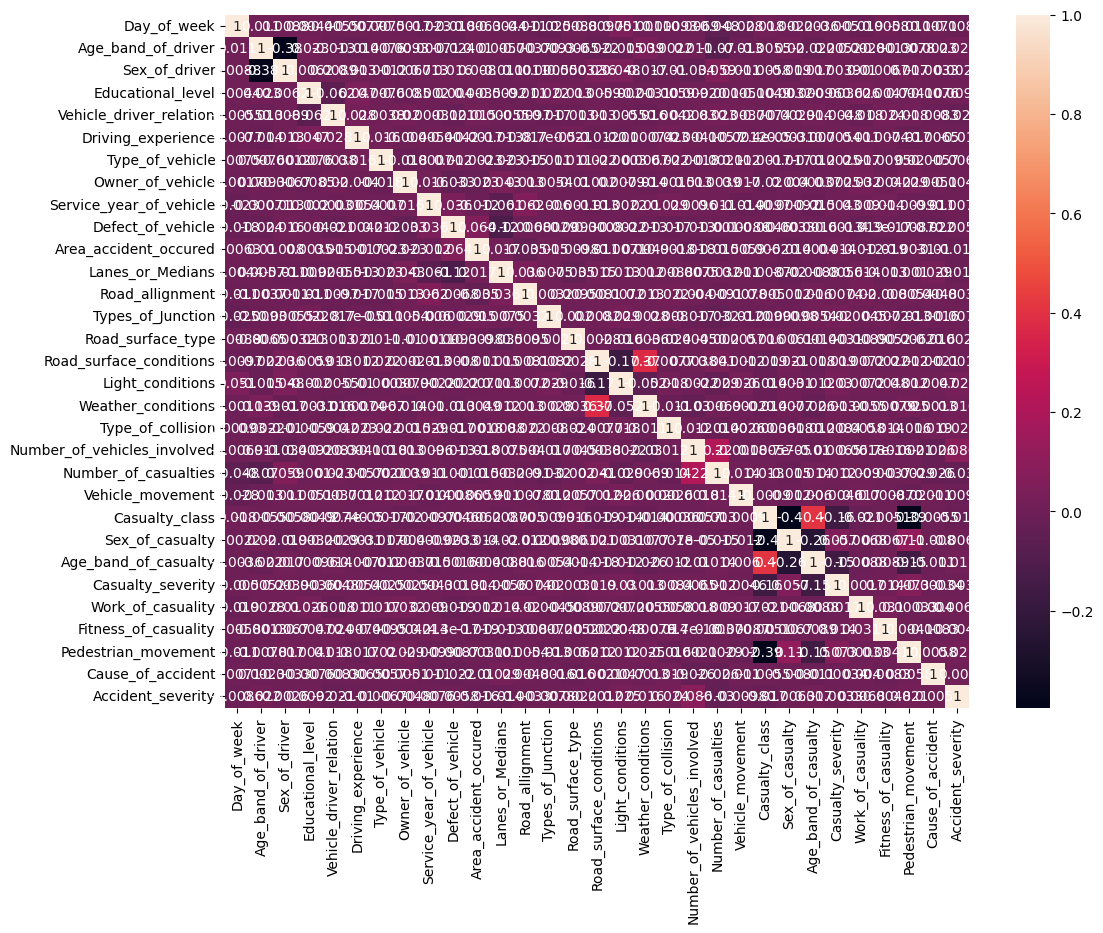

In [24]:
corr = accidents.corr(numeric_only=True)
plt.figure(figsize=(12, 9))
sns.heatmap(corr, annot=True)

#Strong corelated features
#Road_surface_conditions, Weather_conditions, Casualty_class and Age_band_of_casualty, Number_of_vehicles_involved

In [25]:
plt.figure(figsize=(12, 9))
sns.pairplot(data= accidents, corner=True)

Error in callback <function flush_figures at 0x7ebd2f078550> (for post_execute):


KeyboardInterrupt: 

array([[<Axes: title={'center': 'Day_of_week'}>,
        <Axes: title={'center': 'Age_band_of_driver'}>,
        <Axes: title={'center': 'Sex_of_driver'}>,
        <Axes: title={'center': 'Educational_level'}>,
        <Axes: title={'center': 'Vehicle_driver_relation'}>,
        <Axes: title={'center': 'Driving_experience'}>],
       [<Axes: title={'center': 'Type_of_vehicle'}>,
        <Axes: title={'center': 'Owner_of_vehicle'}>,
        <Axes: title={'center': 'Service_year_of_vehicle'}>,
        <Axes: title={'center': 'Defect_of_vehicle'}>,
        <Axes: title={'center': 'Area_accident_occured'}>,
        <Axes: title={'center': 'Lanes_or_Medians'}>],
       [<Axes: title={'center': 'Road_allignment'}>,
        <Axes: title={'center': 'Types_of_Junction'}>,
        <Axes: title={'center': 'Road_surface_type'}>,
        <Axes: title={'center': 'Road_surface_conditions'}>,
        <Axes: title={'center': 'Light_conditions'}>,
        <Axes: title={'center': 'Weather_conditions'}>],

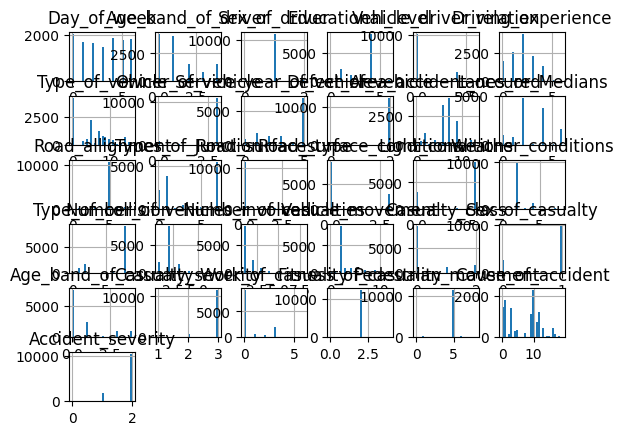

In [ ]:
plt.figure(figsize=(12, 9))
accidents.hist(bins=30)

In [ ]:
plt.figure(figsize=(12, 9))
ax=sns.boxplot(accidents,showmeans=True, palette="crest")

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [30]:
# Split the data
train, test = train_test_split(
    accidents,
    test_size=0.2,
    train_size = 0.8
)

In [43]:
# Create my X, y data

target = "Accident_severity"
features = ['Road_surface_conditions', 'Weather_conditions', 'Casualty_class', 'Age_band_of_casualty', 'Number_of_vehicles_involved']

X_train = accidents[features]
y_train = accidents[target]

X_test = accidents[features]
y_test = accidents[target]

## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [57]:
#Logistic regression
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
score =log_reg.fit(X_train, y_train).score(X_train, y_train)

In [58]:
score

0.8591377590601795

In [59]:
y_pr = log_reg.predict(X_test)

#### Decision Tree Classifier

In [35]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)

# Train the DecisionTreeClassifier on the dataset
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

#### Support Vector Machine (SVM)

In [36]:
from sklearn.svm import SVC

# Train a linear SVM classifier with regularization parameter C=1.0
svm_clf = SVC(kernel="linear", C=1.0)
svm_clf.fit(X_train, y_train)
svm_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([2, 2, 2, ..., 2, 2, 2])

#### K-Neighbors Classifier

In [37]:
from sklearn.neighbors import KNeighborsClassifier

# Creating a KNeighborsClassifier instance with the following parameters:
# - 'weights' set to 'distance' to give closer neighbors more influence on the prediction
# - 'n_neighbors' set to 3, specifying the number of neighbors to consider for classification
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3)

# Fitting the KNeighborsClassifier model to the training data (X_train and y_train)
knn_clf.fit(X_train, y_train)

y_knn_pred = knn_clf.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here: